In [1]:
import pandas as pd
import numpy as np
import requests
import psycopg2
import json
import calendar
import time
import re
from dateutil.parser import parse
import matplotlib.pyplot as plt
import decimal
import sklearn

import boto3
import base64
from botocore.exceptions import ClientError

/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
df = pd.read_csv('consolidated_coin_data.csv')
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,ripple,24-Apr-19,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293"
1,ripple,23-Apr-19,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875"
2,ripple,22-Apr-19,0.322277,0.32935,0.320237,0.323934,"1,131,094,080","13,606,823,301"
3,ripple,21-Apr-19,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430"
4,ripple,20-Apr-19,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592"


In [3]:
df['Currency'].value_counts()

bitcoin         2308
litecoin        2308
ripple          2210
stellar         1844
tether          1635
ethereum        1487
eos              783
bitcoin-cash     761
binance-coin     759
cardano          691
Name: Currency, dtype: int64

In [4]:
df.loc[df['Currency'] == 'bitcoin']

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
3392,bitcoin,24-Apr-19,5571.51,5642.04,5418.26,5464.87,"17,048,033,399","96,530,038,144"
3393,bitcoin,23-Apr-19,5399.37,5633.8,5389.41,5572.36,"15,867,308,108","98,417,387,004"
3394,bitcoin,22-Apr-19,5312.49,5422.69,5280.28,5399.37,"14,601,631,648","95,354,207,776"
3395,bitcoin,21-Apr-19,5335.88,5359.93,5257.34,5314.53,"13,731,844,223","93,847,052,256"
3396,bitcoin,20-Apr-19,5304.16,5358.49,5295.88,5337.89,"13,169,647,522","94,248,717,444"
3397,bitcoin,19-Apr-19,5298.15,5336.68,5233.34,5303.81,"13,780,238,655","93,638,345,002"
3398,bitcoin,18-Apr-19,5251.48,5319.99,5250.51,5298.39,"13,256,489,918","93,532,402,741"
3399,bitcoin,17-Apr-19,5236.14,5274.28,5219.21,5251.94,"12,438,480,677","92,702,617,458"
3400,bitcoin,16-Apr-19,5066.58,5238.95,5055.19,5235.56,"11,618,660,197","92,404,613,297"
3401,bitcoin,15-Apr-19,5167.32,5196.61,5024.07,5067.11,"12,290,155,061","89,422,237,603"


In [5]:
df['UnixDate'] = ""
df['UnixDate'] = df['Date'].apply(lambda x : calendar.timegm(time.strptime(parse(x).date().strftime("%m-%d-%Y"), '%m-%d-%Y')))
df['Date'] = df['Date'].apply(lambda x : parse(x).date().strftime("%m-%d-%Y"))
df['Open'] = df['Open'].apply(lambda x : float(x.replace(',','')))
df['High'] = df['High'].apply(lambda x : float(x.replace(',','')))
df['Close'] = df['Close'].apply(lambda x : float(x.replace(',','')))
df['Low'] = df['Low'].apply(lambda x : float(x.replace(',','')))
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,ripple,04-24-2019,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293",1556064000
1,ripple,04-23-2019,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875",1555977600
2,ripple,04-22-2019,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",1555891200
3,ripple,04-21-2019,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430",1555804800
4,ripple,04-20-2019,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592",1555718400


In [6]:
df.groupby(df['Currency'])['Date'].min().sort_values()

Currency
bitcoin         01-01-2014
litecoin        01-01-2014
ripple          01-01-2014
stellar         01-01-2015
ethereum        01-01-2016
tether          01-01-2016
binance-coin    01-01-2018
bitcoin-cash    01-01-2018
cardano         01-01-2018
eos             01-01-2018
Name: Date, dtype: object

In [7]:
df_focus = df.loc[df['Currency'].isin(['ethereum','ripple','litecoin','bitcoin','stellar','cardano'])]
df_focus = df_focus.loc[df_focus['UnixDate'] > 1438905600]
df_focus.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,ripple,04-24-2019,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293",1556064000
1,ripple,04-23-2019,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875",1555977600
2,ripple,04-22-2019,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",1555891200
3,ripple,04-21-2019,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430",1555804800
4,ripple,04-20-2019,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592",1555718400


In [8]:
df_focus['Currency'].value_counts()

ethereum    1486
ripple      1476
stellar     1476
bitcoin     1476
litecoin    1476
cardano      691
Name: Currency, dtype: int64

In [9]:
df_pivot = pd.pivot_table(df_focus, index=['UnixDate'], values='Open',columns='Currency',aggfunc='first')
df_pivot.count()

Currency
bitcoin     1474
cardano      689
ethereum    1474
litecoin    1474
ripple      1474
stellar     1474
dtype: int64

In [10]:
df_pivot.sort_values(by='UnixDate',ascending=False).head(5)

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1566259200,10916.346717,0.050251,202.813143,77.298387,0.283159,0.071829
1566172800,10350.283631,0.050725,194.556030,76.337109,0.282290,0.070789
1566086400,10233.006297,0.047424,185.841101,72.839596,0.265714,0.067926
1566000000,10358.722541,0.046869,185.531660,74.905089,0.261885,0.068937
1565913600,10319.420346,0.047536,188.644251,76.315247,0.265075,0.070278


In [11]:
df_rec = df_pivot.loc[df_pivot.index.get_level_values(level = 'UnixDate') >= 1510832000] 
df_rec.head()

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1510876800,7853.57,0.027143,330.17,70.45,0.224768,0.037144
1510963200,7697.21,0.025597,331.98,67.41,0.226547,0.035494
1511049600,7766.03,0.026243,347.40,69.51,0.228140,0.036482
1511136000,8039.07,0.028152,354.09,71.41,0.231336,0.036619
1511222400,8205.74,0.029587,367.44,72.20,0.237978,0.038127


In [12]:
from sklearn import preprocessing
x = df_rec.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_norm = pd.DataFrame(x_scaled)
df_norm.columns = df_rec.columns
df_norm.index = df_rec.index
df_norm.head()

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1510876800,0.284325,0.001351,0.187245,0.139989,0.000361,0.001926
1510963200,0.274696,0.000000,0.188623,0.130932,0.000928,0.000000
1511049600,0.278934,0.000564,0.200366,0.137188,0.001436,0.001153
1511136000,0.295747,0.002233,0.205460,0.142849,0.002455,0.001313
1511222400,0.306011,0.003487,0.215626,0.145202,0.004573,0.003073


<Figure size 432x288 with 0 Axes>

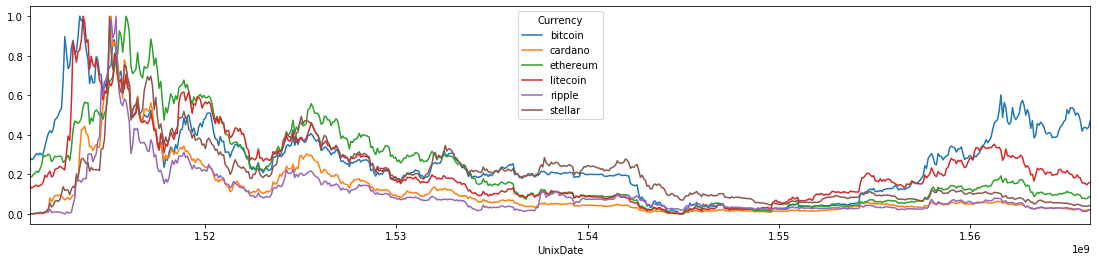

In [13]:
plt.figure()
df_norm.plot(figsize=(19,4))

<Figure size 432x288 with 0 Axes>

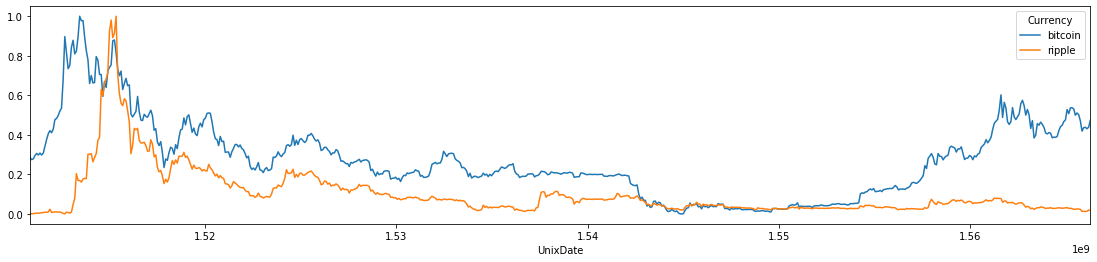

In [14]:
plt.figure()
df_norm[['bitcoin','ripple']].plot(figsize=(19,4))

In [15]:
df_ml = pd.DataFrame(data={'bitcoin':df_norm['bitcoin'].values,'ethereum':df_norm['ethereum'].values,'litecoin':df_norm['litecoin'].values,'ripple':df_norm['ripple'].values},index=df_norm.index)

In [16]:
df_ml.head()

,bitcoin,ethereum,litecoin,ripple
UnixDate,,,,
1510876800,0.284325,0.187245,0.139989,0.000361
1510963200,0.274696,0.188623,0.130932,0.000928
1511049600,0.278934,0.200366,0.137188,0.001436
1511136000,0.295747,0.205460,0.142849,0.002455
1511222400,0.306011,0.215626,0.145202,0.004573


In [17]:
X = df_ml[['ripple','litecoin','ethereum']]
y = df_ml['bitcoin']

In [18]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

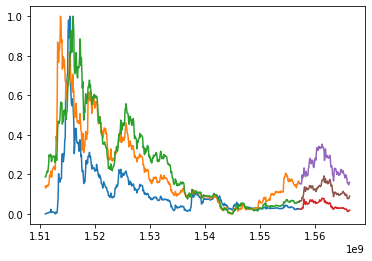

In [19]:
plt.plot(X_train)
plt.plot(X_test)
plt.show()

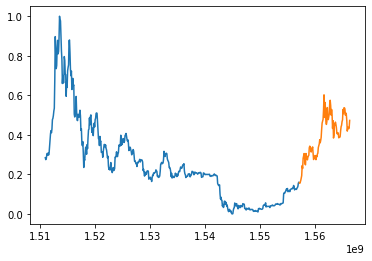

In [20]:
plt.plot(y_train)
plt.plot(y_test)
plt.show()

# LSTM

In [21]:
X_train = np.reshape(X_train.to_numpy(), (X_train.to_numpy().shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.to_numpy(), (X_test.to_numpy().shape[0], 1, X_test.shape[1]))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model2 = Sequential()
model2.add(layers.LSTM(20, input_shape=(1, 3), return_sequences=True))
model2.add(layers.LSTM(20))
model2.add(layers.Dense(1, activation='relu'))
model2.compile(optimizer="adam", loss="mean_squared_error")
model2.fit(X_train, y_train, epochs=75, verbose=0)

In [23]:
model2.evaluate(X_test, y_test)

107/107 [==============================] - 1s 10ms/sample - loss: 0.0363


0.03626818634639276

In [24]:
m2predictions = model2.predict(X_test)
zipped2 = list(zip(m2predictions,y_test))

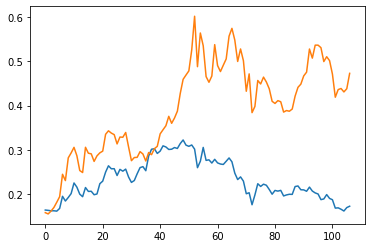

In [25]:
#plt.xticks(zipped[1],y_test.index)
plt.plot(zipped2)

In [26]:
df_focus.loc[df_focus['Currency'] == 'bitcoin'].sort_values(by='UnixDate',ascending=True, axis=0).reset_index().sort_index(ascending=True, axis=0)

,index,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,4747,bitcoin,08-08-2015,279.740000,279.930000,260.710000,261.000000,"58,533,000","3,778,049,024",1438992000
1,4746,bitcoin,08-09-2015,261.120000,267.000000,260.470000,265.080000,"23,789,600","3,838,130,130",1439078400
2,4745,bitcoin,08-10-2015,265.480000,267.030000,262.600000,264.470000,"20,979,400","3,830,352,069",1439164800
3,4744,bitcoin,08-11-2015,264.340000,270.390000,264.090000,270.390000,"25,433,900","3,917,142,819",1439251200
4,4743,bitcoin,08-12-2015,270.600000,270.670000,265.470000,266.380000,"26,815,400","3,859,888,131",1439337600
5,4742,bitcoin,08-13-2015,266.180000,266.230000,262.840000,264.080000,"27,685,500","3,827,588,724",1439424000
6,4741,bitcoin,08-14-2015,264.130000,267.470000,261.480000,265.680000,"27,091,200","3,851,715,726",1439510400
7,4740,bitcoin,08-15-2015,265.530000,266.670000,261.300000,261.550000,"19,321,100","3,792,757,590",1439596800
8,4739,bitcoin,08-16-2015,261.870000,262.440000,257.040000,258.510000,"29,717,000","3,749,501,856",1439683200
9,4738,bitcoin,08-17-2015,258.490000,260.510000,257.120000,257.980000,"21,617,900","3,742,748,055",1439769600


In [27]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
df = df_focus.loc[df_focus['Currency'] == 'bitcoin'].sort_values(by='UnixDate',ascending=True, axis=0).reset_index()

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

Using TensorFlow backend.


In [28]:
#df.sort_values(by='UnixDate',ascending=True, axis=0)

In [29]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1247,:]
valid = dataset[1247:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

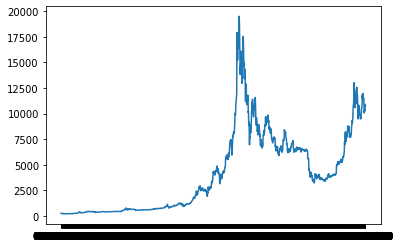

In [30]:
plt.plot(new_data)

In [31]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# create and fit the LSTM network
model4 = Sequential()
model4.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model4.add(LSTM(units=50))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model4.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Train on 1217 samples
1217/1217 - 28s - loss: 0.0028


In [32]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

1015.8959193906394

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


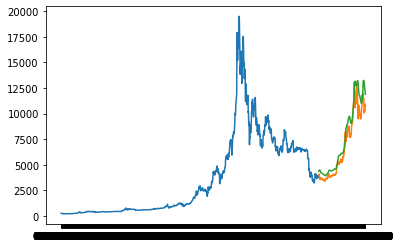

In [33]:
train = new_data[:1247]
valid = new_data[1247:]
valid['Predictions'] = closing_price

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

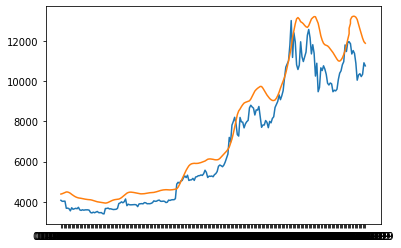

In [34]:
plt.plot(valid[['Close','Predictions']])

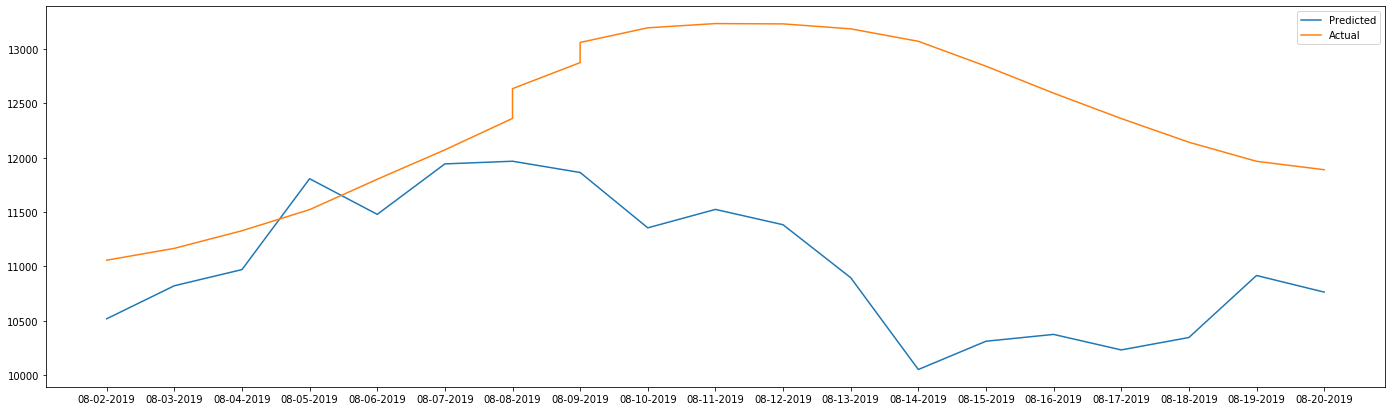

In [35]:
plt.figure(figsize=(24,7))
plt.plot(valid[['Close','Predictions']].tail(21))
plt.legend(['Predicted','Actual'])

In [36]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df_ml.head()

,bitcoin,ethereum,litecoin,ripple
UnixDate,,,,
1510876800,0.284325,0.187245,0.139989,0.000361
1510963200,0.274696,0.188623,0.130932,0.000928
1511049600,0.278934,0.200366,0.137188,0.001436
1511136000,0.295747,0.205460,0.142849,0.002455
1511222400,0.306011,0.215626,0.145202,0.004573


In [38]:
from datetime import datetime

In [39]:
def convertToDate(x):
    return datetime.utcfromtimestamp(x).strftime('%m-%d-%Y')

In [40]:
df_ml['Date'] = df_ml.index.map(convertToDate)

In [41]:
df_ml

,bitcoin,ethereum,litecoin,ripple,Date
UnixDate,,,,,
1510876800,0.284325,0.187245,0.139989,0.000361,11-17-2017
1510963200,0.274696,0.188623,0.130932,0.000928,11-18-2017
1511049600,0.278934,0.200366,0.137188,0.001436,11-19-2017
1511136000,0.295747,0.205460,0.142849,0.002455,11-20-2017
1511222400,0.306011,0.215626,0.145202,0.004573,11-21-2017
1511308800,0.298142,0.210196,0.139184,0.002871,11-22-2017
1511395200,0.307651,0.226287,0.144547,0.004896,11-23-2017
1511481600,0.297900,0.249939,0.148003,0.006127,11-24-2017
1511568000,0.308226,0.298051,0.162213,0.006550,11-25-2017


In [42]:
df_ml.sort_values(by='UnixDate',ascending=True, axis=0).reset_index()

,UnixDate,bitcoin,ethereum,litecoin,ripple,Date
0,1510876800,0.284325,0.187245,0.139989,0.000361,11-17-2017
1,1510963200,0.274696,0.188623,0.130932,0.000928,11-18-2017
2,1511049600,0.278934,0.200366,0.137188,0.001436,11-19-2017
3,1511136000,0.295747,0.205460,0.142849,0.002455,11-20-2017
4,1511222400,0.306011,0.215626,0.145202,0.004573,11-21-2017
5,1511308800,0.298142,0.210196,0.139184,0.002871,11-22-2017
6,1511395200,0.307651,0.226287,0.144547,0.004896,11-23-2017
7,1511481600,0.297900,0.249939,0.148003,0.006127,11-24-2017
8,1511568000,0.308226,0.298051,0.162213,0.006550,11-25-2017
9,1511654400,0.341929,0.290656,0.195073,0.009335,11-26-2017


In [67]:
df_lstm = pd.DataFrame(data={'bitcoin':df_rec['bitcoin'].values,'ethereum':df_rec['ethereum'].values,'litecoin':df_rec['litecoin'].values,'ripple':df_rec['ripple'].values},index=df_rec.index)

In [77]:
#df = df_focus.loc[(df_focus['Currency'] == 'bitcoin') | (df_focus['Currency'] == 'ethereum')].sort_values(by='UnixDate',ascending=True, axis=0).reset_index()
#'UniDate':df_rec.index
df=None
df = df_lstm.sort_values(by='UnixDate',ascending=True, axis=0).reset_index()
#df = df_temp


df.head()
new_data = df.sort_index(ascending=True, axis=0)
new_data.head()

,UnixDate,bitcoin,ethereum,litecoin,ripple,UniDate
0,1510876800,7853.57,330.17,70.45,0.224768,1510876800
1,1510963200,7697.21,331.98,67.41,0.226547,1510963200
2,1511049600,7766.03,347.40,69.51,0.228140,1511049600
3,1511136000,8039.07,354.09,71.41,0.231336,1511136000
4,1511222400,8205.74,367.44,72.20,0.237978,1511222400


In [78]:

#new_data = pd.DataFrame(index=range(0,len(df)),columns=['UnixDate', 'ethereum', 'ripple', 'litecoin'])
new_data.columns

Index(['UnixDate', 'bitcoin', 'ethereum', 'litecoin', 'ripple', 'UniDate'], dtype='object')

In [79]:
new_data = new_data.loc[new_data['UnixDate'] >= 1510832000] 

In [80]:
new_data = new_data[['UnixDate','ethereum','litecoin','ripple']]
new_data.head()

,UnixDate,ethereum,litecoin,ripple
0,1510876800,330.17,70.45,0.224768
1,1510963200,331.98,67.41,0.226547
2,1511049600,347.40,69.51,0.228140
3,1511136000,354.09,71.41,0.231336
4,1511222400,367.44,72.20,0.237978


In [81]:
#previous days to use for prediction
lookbehind = 30
train_ratio = .7
num_samples = len(df)
train_samples = int(train_ratio * num_samples)

#setting index
new_data.index = new_data.index
new_data.drop('UnixDate', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [82]:
train = dataset[0:train_samples,:]
valid = dataset[train_samples:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [83]:
x_train, y_train = [], []
for i in range(lookbehind,len(train)):
    x_train.append(scaled_data[i-lookbehind:i,:])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],3))

In [84]:
# create and fit the LSTM network
model4 = Sequential()
model4.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],3)))
model4.add(LSTM(units=50))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Train on 419 samples
419/419 - 10s - loss: 0.0095


In [85]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - lookbehind:].values
inputs = inputs.reshape(-1,3)
inputs  = scaler.transform(inputs)

In [86]:
X_test = []
for i in range(lookbehind,inputs.shape[0]):
    X_test.append(list(inputs[i-lookbehind:i]))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],3))
closing_price = model4.predict(X_test)

In [87]:
exit_scaler = MinMaxScaler(feature_range=(0, 1))
exit_scaler.fit(dataset[:,0].reshape(-1,1))
closing_price = exit_scaler.inverse_transform(closing_price)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5, 1.0, 'Ethereum Prediction Using Ethereum, Litecoin, and Ripple')

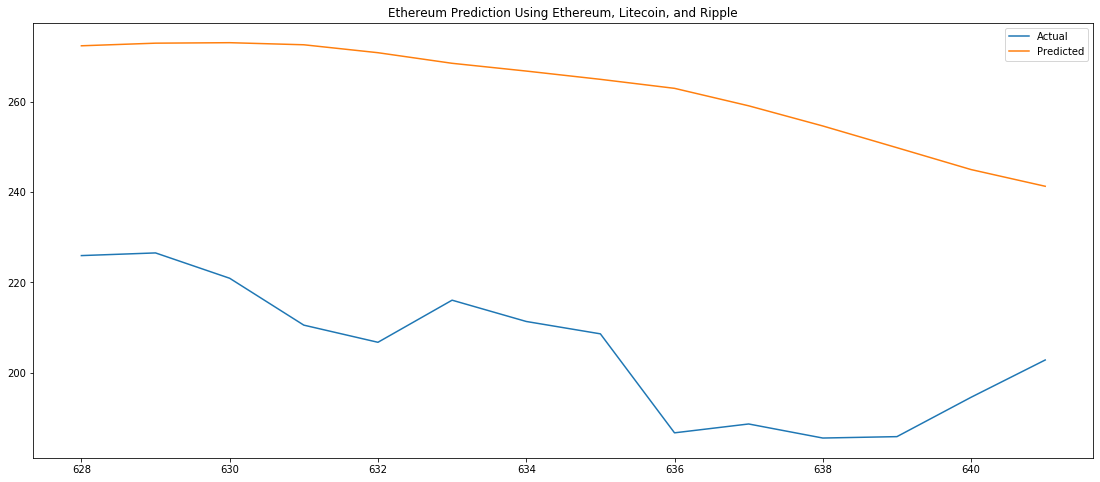

In [90]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

train = new_data[:train_samples]
valid = new_data[train_samples:]
valid['Predictions'] = closing_price

#plt.plot(train['Close'])
plt.figure(figsize=(19,8))
#plt.subplot(2, 1, 1)

#plt.plot(train['Close'])
#plt.plot(valid[['ethereum','Predictions']])
#plt.legend(['Actual','Predicted'])
#plt.title('Ethereum: ' + str(lookbehind) + ' Day Interval, ' + ('{0:.0%}'.format(train_ratio)) + ' Train Split')

#plt.subplot(2, 1, 2)
#plt.figure(figsize=(19,8))
plt.plot(valid[['ethereum','Predictions']].tail(14))
plt.legend(['Actual','Predicted'])
plt.title('Ethereum Prediction Using Ethereum, Litecoin, and Ripple')